In [79]:
#lets import all the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#Machine Learning
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import r2_score

# load xg boost
import xgboost as xgb

#import and supress warnings
import warnings
warnings.filterwarnings('ignore')

In [80]:
# loading my data frame
my_data_frame = pd.read_csv("C:\\Users\\welcome\\Desktop\\Machine learning\\gradient boosting\\HR-Employee-resignation.csv")

In [81]:
# my top 5 rows
my_data_frame.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [82]:
my_data_frame.shape
#checking number of rows and the columns

(1470, 35)

In [83]:
# checking info for each and every column
my_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [84]:
# bottom of my table
my_data_frame.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [85]:
# staistics for each and evry coloumn
my_data_frame.describe()
#i can check the max and min for each and every column
# i can also check percentiles for each and every column

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [86]:
# checking for the missing values
my_data_frame.isnull().sum()
#since i dont have any missing values, so i dont need to go for the treatment.

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [87]:
my_data_frame.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='EducationField'>

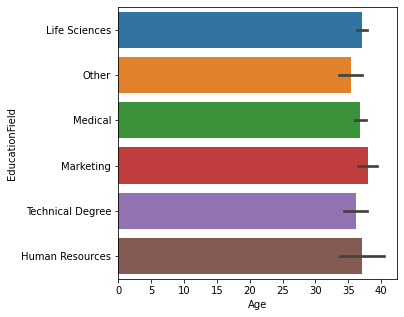

In [88]:
plot = plt.figure(figsize = (5,5))
sns.barplot(x = 'Age' ,y = 'EducationField', data = my_data_frame)

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Density'>

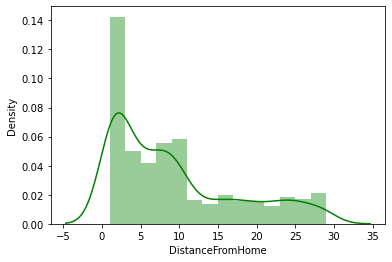

In [89]:
#checking the distribution of the distance..
sns.distplot(my_data_frame['DistanceFromHome'], color = 'green')

<AxesSubplot:xlabel='Attrition', ylabel='DailyRate'>

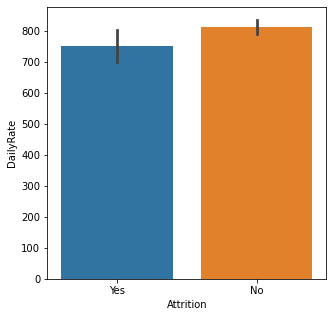

In [90]:
plot = plt.figure(figsize = (5,5))
sns.barplot(x = 'Attrition' ,y = 'DailyRate', data = my_data_frame)

<AxesSubplot:xlabel='Age', ylabel='Density'>

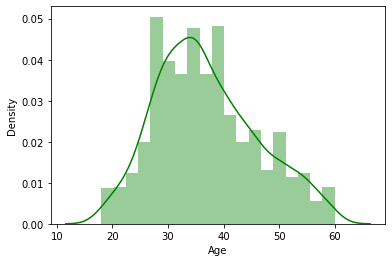

In [91]:
#checking the distribution of the age..
sns.distplot(my_data_frame['Age'], color = 'green')

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Density'>

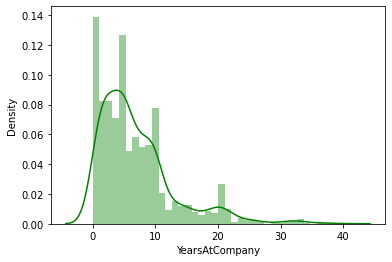

In [92]:
sns.distplot(my_data_frame['YearsAtCompany'],color = 'green')

Correlation of Features

In [93]:
correlation = my_data_frame.corr()

<AxesSubplot:>

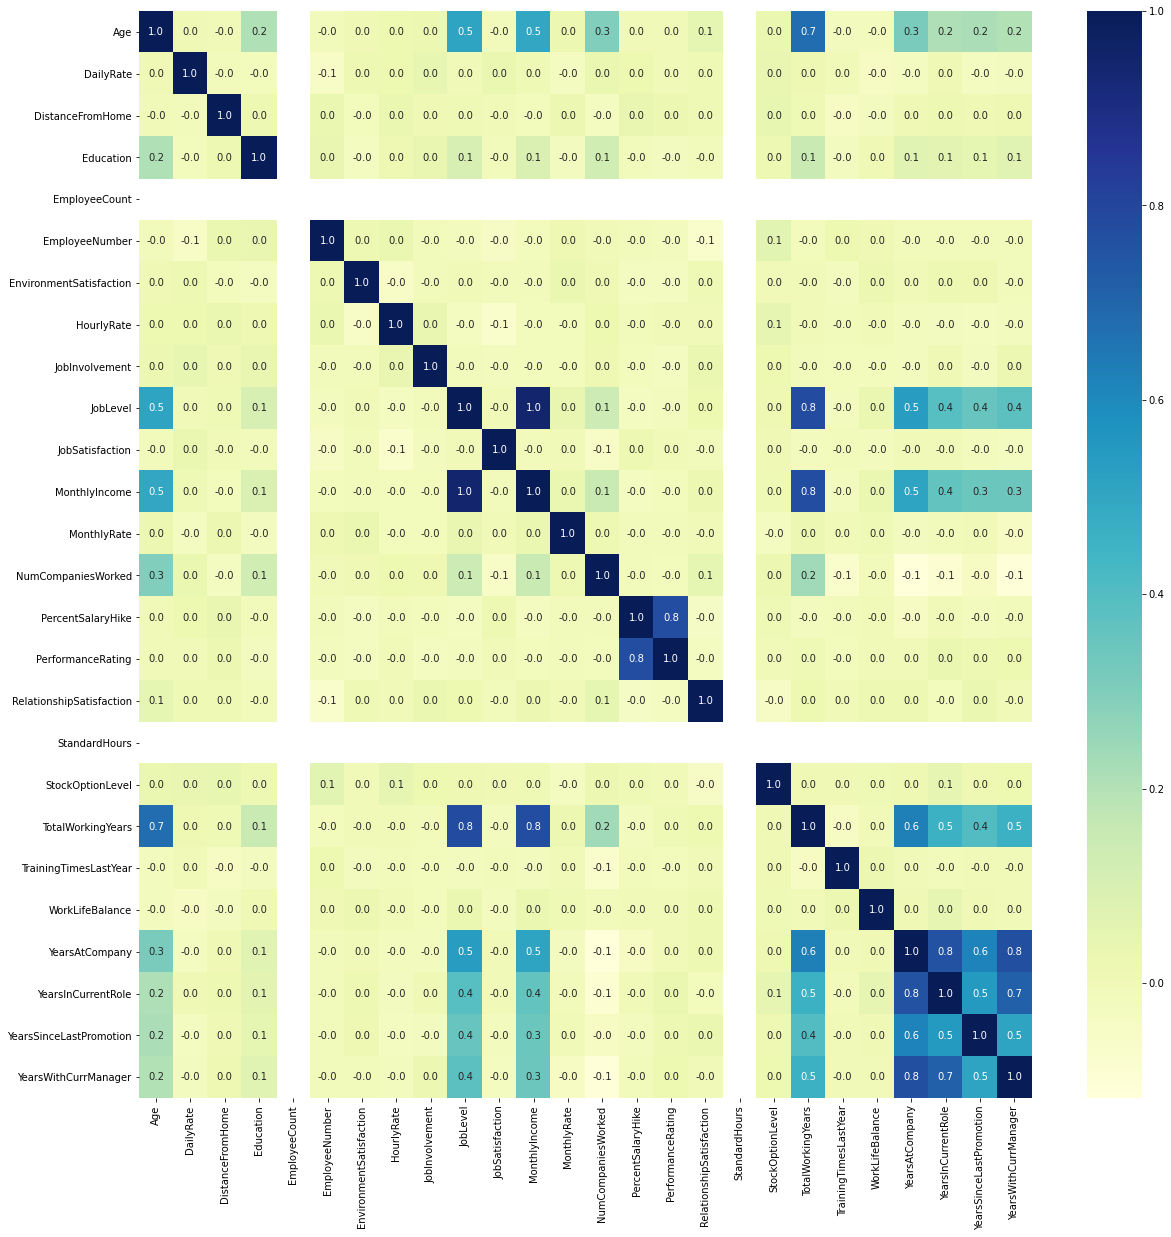

In [94]:
plt.figure(figsize = (20,20))
sns.heatmap(correlation,cmap="YlGnBu",annot = True,fmt='.1f')
# NEGATIVE correlations has negative value
# positive correlations has positive value

In [95]:
# here before feeding data to my algorithm, i need to have numerical data
# here there is categorical data, where i need to encode it into numerical. i can use one hot encoding here..
# Encoding process - one hot encoding
# seperate your data into categorical and numerical
# Empty list to store columns with categorical data
categorical = []
for col, value in my_data_frame.iteritems():
    if value.dtype == 'object':
        categorical.append(col)

# Store the numerical columns in a list numerical
numerical = my_data_frame.columns.difference(categorical)

In [96]:
numerical
# my numerical data columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [97]:
categorical
# my categorical data columns

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [98]:
# multiple ways to convert cat to numerical, i am choosing..
# Encoding process - one hot encoding
my_data_frame_cat = my_data_frame[categorical]

In [99]:
my_data_frame_cat1 = my_data_frame_cat.drop(['Attrition'], axis=1)

In [100]:
my_data_frame_cat1

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [101]:
#lets do one One Hot Encoding ( OHE)
# Process of converting your cat data into numerical format - Encoding process 
my_data_frame_cat1= pd.get_dummies(my_data_frame_cat1)

In [102]:
my_data_frame_cat1.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0


In [103]:
my_data_frame_num = my_data_frame[numerical]

In [104]:
#lets concat both of the data frames.
x = pd.concat([my_data_frame_cat1,my_data_frame_num], axis = 1)

In [105]:
x.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,0,1,0,0,1,0,1,0,0,...,1,80,0,8,0,1,6,4,0,5
1,0,1,0,0,1,0,0,1,0,0,...,4,80,1,10,3,3,10,7,1,7
2,0,0,1,0,1,0,0,0,0,0,...,2,80,0,7,3,3,0,0,0,0
3,0,1,0,0,1,0,0,1,0,0,...,3,80,0,8,3,3,8,7,3,0
4,0,0,1,0,1,0,0,0,0,1,...,4,80,1,6,3,3,2,2,2,2


In [106]:
# Defining a dictionary for the target mapping
target = {'Yes':1,'No':0}
y = my_data_frame['Attrition'].apply(lambda x: target[x])

In [107]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

Splitting Data into Train and Test sets

In [108]:
# from sklearn
X_train,X_test,Y_train,Y_test = train_test_split(x,y,train_size= 0.7,random_state=0)


In [109]:
X_train.shape

(1029, 55)

In [110]:
Y_train.shape

(1029,)

In [111]:
X_test.shape

(441, 55)

In [112]:
Y_test.shape

(441,)

 Implementing Machine Learning Models<br>
 ## Xgboost Classifier

In [113]:
xgb_class = xgb.XGBClassifier(n_jobs= -1, objective = 'binary:logistic')

**STEP: APPLYING MACHINE LEARNING MODEL**

Model Training:

GradientBoostingClassifier

In [114]:
#lets train our model with fit function
train = xgb_class.fit(X_train, Y_train)

[14:33:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Model Evaluation

Accuracy Score

In [115]:
gradient_boost_pred = xgb_class.predict(X_test)

In [116]:
accuracy_score(Y_test,gradient_boost_pred)

0.8820861678004536

Implementing the XG boost regressor in Python

In [117]:
# loading my data frame
my_data_frame_reg = pd.read_csv('C:\\Users\\welcome\\Desktop\\Machine learning\\gradient boosting\\kc_house_data.csv')

In [118]:
my_data_frame_reg.head()
#House sales prediction.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [119]:
my_data_frame_reg.describe()
#checking stats

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [120]:
my_data_frame_reg.isnull().sum()
# missing value check

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [121]:
my_data_frame_reg.bedrooms.value_counts()
# checking bed room count

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

In [122]:
my_data_frame_reg.bathrooms.value_counts()
# checking bathroom count

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
6.25       2
8.00       2
6.75       2
6.50       2
7.75       1
7.50       1
Name: bathrooms, dtype: int64

<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

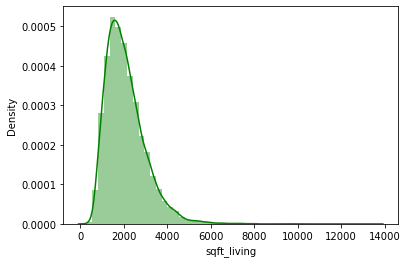

In [123]:
sns.distplot(my_data_frame_reg['sqft_living'], color= 'green')
# distribution check for the sqft_living coloumn
# 2000sq ft_ living has high distribution

<AxesSubplot:xlabel='yr_built', ylabel='Density'>

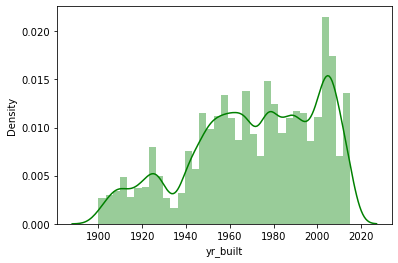

In [124]:
sns.distplot(my_data_frame_reg['yr_built'], color= 'green')
# i can see my buit year

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

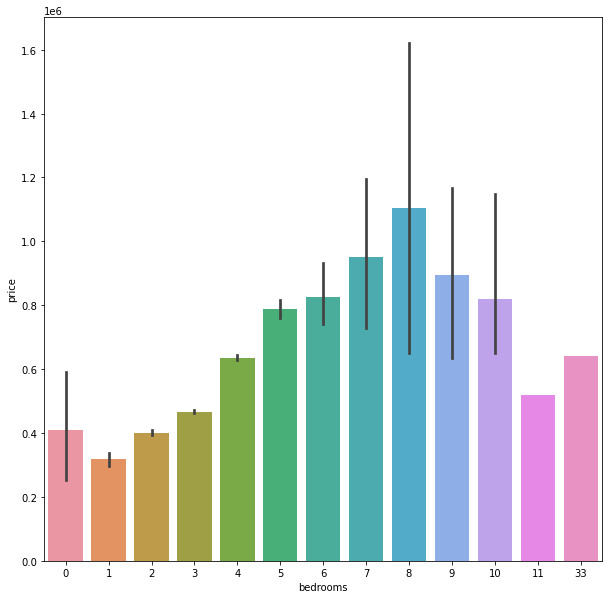

In [125]:
plot = plt.figure(figsize = (10,10))
sns.barplot(x ='bedrooms',y='price', data = my_data_frame_reg)
#my price is increasing gradually with more no of bedrooms....and there is sharp dip for 9,10,11 bedrooms, could be due to less sqft.

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

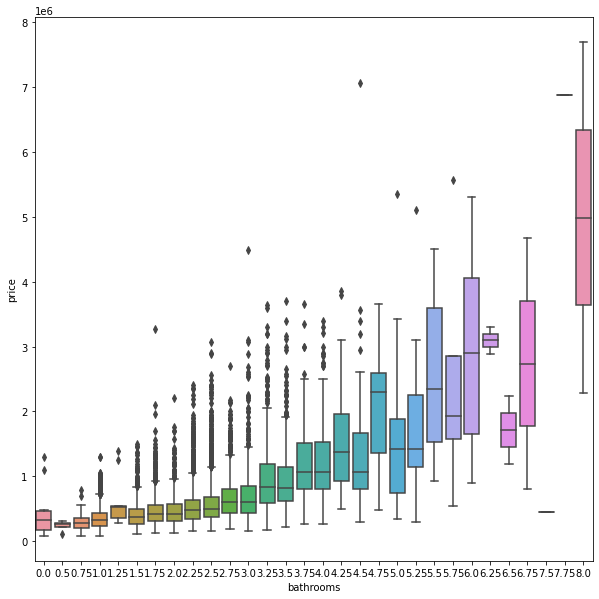

In [126]:
plot = plt.figure(figsize = (10,10))
sns.boxplot(x ='bathrooms',y='price', data = my_data_frame_reg)
#my price is increasing gradually with more no of bathrooms....

<AxesSubplot:xlabel='floors', ylabel='price'>

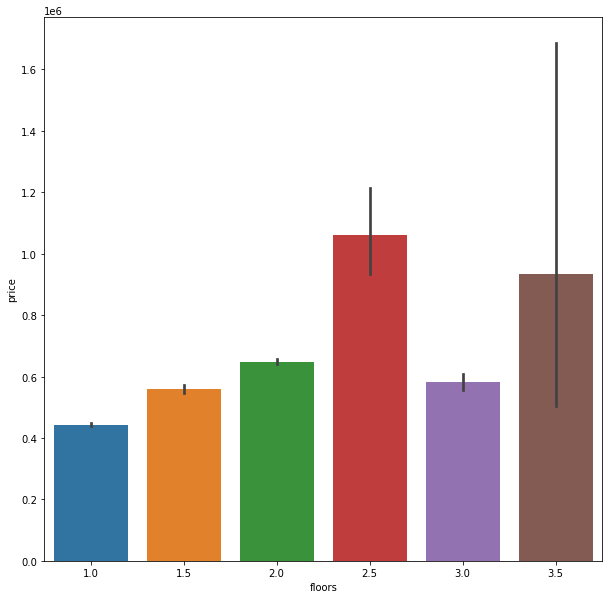

In [127]:
plot = plt.figure(figsize = (10,10))
sns.barplot(x ='floors',y='price', data = my_data_frame_reg)
#my price is incresing unti 2 nd floor and there is sudden drop later for the 3rd floor and price gradually incresed for the next floor.

<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

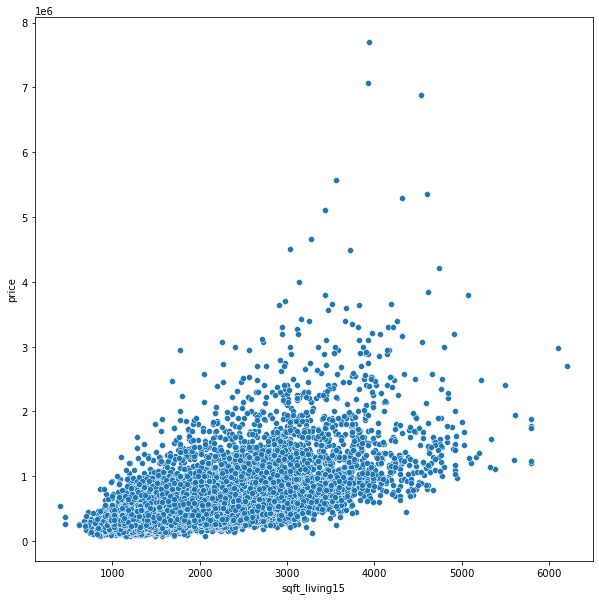

In [128]:
plot = plt.figure(figsize = (10,10))
sns.scatterplot(x ='sqft_living15',y='price', data = my_data_frame_reg)
# my price is high for the 4000sqft house

In [129]:
# As id and date columns are not important to predict price so we are discarding it for finding correlation
my_data_frame_reg = my_data_frame_reg.drop(['id','date'], axis=1)

Correlation of Features

In [130]:
correlation = my_data_frame_reg.corr()

<AxesSubplot:>

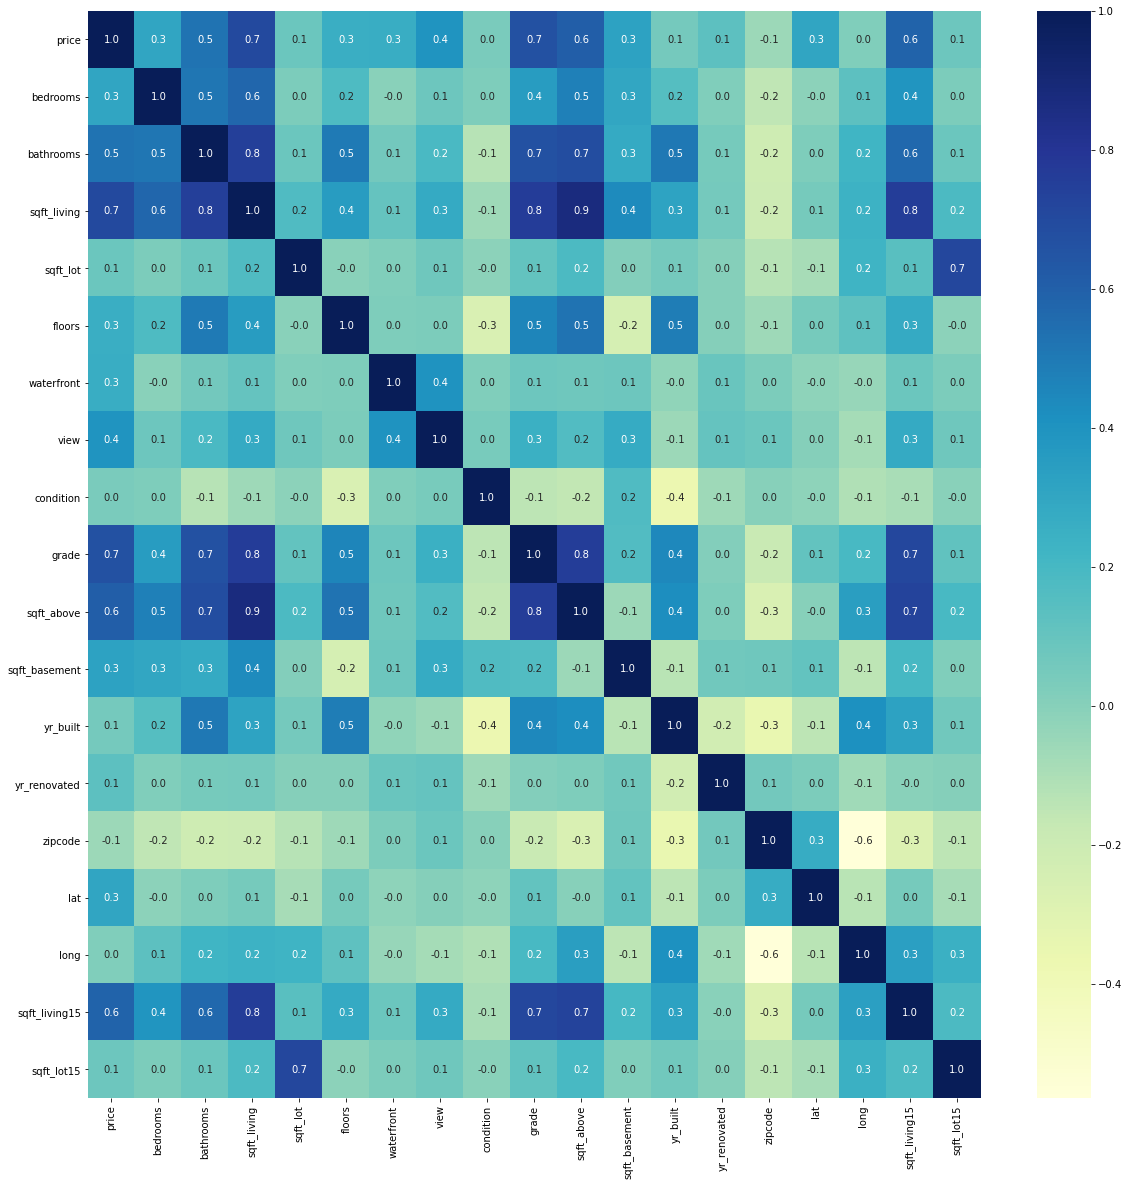

In [131]:
# Plotting all the correlated features value with respect to price which is the target variable.
# Checking Corelation with price.
plot = plt.figure(figsize=(20,20))
sns.heatmap(correlation,annot=True, cmap="YlGnBu",fmt='.1f')
# NEGATIVE correlations has negative value
# positive correlations has positive value

SPLITTING DATA INTO TRAINING AND TESTING SET

In [132]:
#splitting my data into x and y variable, y- variable is my target, which is having price column.
x= my_data_frame_reg.drop('price',axis=1)
y= my_data_frame_reg['price']

In [133]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y, train_size = 0.75, random_state=100)

In [134]:
X_train.shape

(16209, 18)

In [135]:
X_test.shape

(5404, 18)

In [136]:
Y_train.shape

(16209,)

**STEP: APPLYING MACHINE LEARNING MODEL**

Model Training
    
XG Boosting Regressor

In [137]:
#lets initialize,
xg_boost_reg = xgb.XGBRegressor(n_jobs = -1)

In [138]:
# training
training= xg_boost_reg.fit(X_train,Y_train)

Model Evaluation

Accuracy Score

In [142]:
prediction = xg_boost_reg.predict(X_test)

In [143]:
#NOW I CAN COMPARE PREDICTED WITH ACTUAL VALUES
# R squared error
error_score = r2_score(Y_test,prediction)
error_score

0.8777759820762245